In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from math import *

In [15]:
files = [file for file in os.listdir("./201719Data")]
all_years_data = pd.DataFrame()
for file in files:
    df = pd.read_csv("./201719Data/"+file)
    all_years_data = pd.concat([all_years_data, df])

all_years_data.to_csv("201719NYC.csv", index=False)

In [2]:
all_data = pd.read_csv("201719NYC.csv")

In [3]:
all_data.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,362,2017-09-01 00:00:17,2017-09-01 00:06:19,3331.0,Riverside Dr & W 104 St,40.801343,-73.971146,3328.0,W 100 St & Manhattan Ave,40.795000,-73.964500,14530,Subscriber,1993.0,1
1,188,2017-09-01 00:00:21,2017-09-01 00:03:30,3101.0,N 12 St & Bedford Ave,40.720798,-73.954847,3100.0,Nassau Ave & Newell St,40.724813,-73.947526,15475,Subscriber,1988.0,1
2,305,2017-09-01 00:00:25,2017-09-01 00:05:30,3140.0,1 Ave & E 78 St,40.771404,-73.953517,3141.0,1 Ave & E 68 St,40.765005,-73.958185,30346,Subscriber,1969.0,1
3,223,2017-09-01 00:00:52,2017-09-01 00:04:36,236.0,St Marks Pl & 2 Ave,40.728419,-73.987140,473.0,Rivington St & Chrystie St,40.721101,-73.991925,28056,Subscriber,1993.0,1
4,758,2017-09-01 00:01:01,2017-09-01 00:13:40,3427.0,Lafayette St & Jersey St,40.724305,-73.996010,3431.0,E 35 St & 3 Ave,40.746524,-73.977885,25413,Subscriber,1987.0,1


In [4]:
del all_data['start station id']
del all_data['start station latitude']
del all_data['start station longitude']
del all_data['end station id']
del all_data['end station latitude']
del all_data['end station longitude']

In [5]:
all_data.head()

,tripduration,starttime,stoptime,start station name,end station name,bikeid,usertype,birth year,gender
0,362,2017-09-01 00:00:17,2017-09-01 00:06:19,Riverside Dr & W 104 St,W 100 St & Manhattan Ave,14530,Subscriber,1993.0,1
1,188,2017-09-01 00:00:21,2017-09-01 00:03:30,N 12 St & Bedford Ave,Nassau Ave & Newell St,15475,Subscriber,1988.0,1
2,305,2017-09-01 00:00:25,2017-09-01 00:05:30,1 Ave & E 78 St,1 Ave & E 68 St,30346,Subscriber,1969.0,1
3,223,2017-09-01 00:00:52,2017-09-01 00:04:36,St Marks Pl & 2 Ave,Rivington St & Chrystie St,28056,Subscriber,1993.0,1
4,758,2017-09-01 00:01:01,2017-09-01 00:13:40,Lafayette St & Jersey St,E 35 St & 3 Ave,25413,Subscriber,1987.0,1


In [6]:
all_data['starttime'] = pd.to_datetime(all_data["starttime"])
all_data['stoptime'] = pd.to_datetime(all_data["stoptime"])
all_data['year'] = all_data["starttime"].dt.year
all_data['month'] = all_data["starttime"].dt.month

In [7]:
all_data.head()

,tripduration,starttime,stoptime,start station name,end station name,bikeid,usertype,birth year,gender,year,month
0,362,2017-09-01 00:00:17,2017-09-01 00:06:19,Riverside Dr & W 104 St,W 100 St & Manhattan Ave,14530,Subscriber,1993.0,1,2017,9
1,188,2017-09-01 00:00:21,2017-09-01 00:03:30,N 12 St & Bedford Ave,Nassau Ave & Newell St,15475,Subscriber,1988.0,1,2017,9
2,305,2017-09-01 00:00:25,2017-09-01 00:05:30,1 Ave & E 78 St,1 Ave & E 68 St,30346,Subscriber,1969.0,1,2017,9
3,223,2017-09-01 00:00:52,2017-09-01 00:04:36,St Marks Pl & 2 Ave,Rivington St & Chrystie St,28056,Subscriber,1993.0,1,2017,9
4,758,2017-09-01 00:01:01,2017-09-01 00:13:40,Lafayette St & Jersey St,E 35 St & 3 Ave,25413,Subscriber,1987.0,1,2017,9


In [8]:
all_data['start_hour'] = all_data['starttime'].dt.hour
all_data['day_of_week'] = all_data['starttime'].dt.day_name()

In [9]:
all_data.head()

,tripduration,starttime,stoptime,start station name,end station name,bikeid,usertype,birth year,gender,year,month,start_hour,day_of_week
0,362,2017-09-01 00:00:17,2017-09-01 00:06:19,Riverside Dr & W 104 St,W 100 St & Manhattan Ave,14530,Subscriber,1993.0,1,2017,9,0,Friday
1,188,2017-09-01 00:00:21,2017-09-01 00:03:30,N 12 St & Bedford Ave,Nassau Ave & Newell St,15475,Subscriber,1988.0,1,2017,9,0,Friday
2,305,2017-09-01 00:00:25,2017-09-01 00:05:30,1 Ave & E 78 St,1 Ave & E 68 St,30346,Subscriber,1969.0,1,2017,9,0,Friday
3,223,2017-09-01 00:00:52,2017-09-01 00:04:36,St Marks Pl & 2 Ave,Rivington St & Chrystie St,28056,Subscriber,1993.0,1,2017,9,0,Friday
4,758,2017-09-01 00:01:01,2017-09-01 00:13:40,Lafayette St & Jersey St,E 35 St & 3 Ave,25413,Subscriber,1987.0,1,2017,9,0,Friday


In [10]:
all_data['tripduration'] = all_data['tripduration'].astype('float')
all_data['tripduration'] = all_data['tripduration']/60
all_data.head()

,tripduration,starttime,stoptime,start station name,end station name,bikeid,usertype,birth year,gender,year,month,start_hour,day_of_week
0,6.033333,2017-09-01 00:00:17,2017-09-01 00:06:19,Riverside Dr & W 104 St,W 100 St & Manhattan Ave,14530,Subscriber,1993.0,1,2017,9,0,Friday
1,3.133333,2017-09-01 00:00:21,2017-09-01 00:03:30,N 12 St & Bedford Ave,Nassau Ave & Newell St,15475,Subscriber,1988.0,1,2017,9,0,Friday
2,5.083333,2017-09-01 00:00:25,2017-09-01 00:05:30,1 Ave & E 78 St,1 Ave & E 68 St,30346,Subscriber,1969.0,1,2017,9,0,Friday
3,3.716667,2017-09-01 00:00:52,2017-09-01 00:04:36,St Marks Pl & 2 Ave,Rivington St & Chrystie St,28056,Subscriber,1993.0,1,2017,9,0,Friday
4,12.633333,2017-09-01 00:01:01,2017-09-01 00:13:40,Lafayette St & Jersey St,E 35 St & 3 Ave,25413,Subscriber,1987.0,1,2017,9,0,Friday


In [11]:
# Save cleaned data to a csv file to begin analysis
cleaned_data = all_data
cleaned_data.to_csv("201719NYCCleaned.csv", index=False)

In [3]:
new_clean=pd.read_csv('201719NYCCleaned.csv')
new_clean.head()

,tripduration,starttime,stoptime,start station name,end station name,bikeid,usertype,birth year,gender,year,month,start_hour,day_of_week
0,6.033333,2017-09-01 00:00:17,2017-09-01 00:06:19,Riverside Dr & W 104 St,W 100 St & Manhattan Ave,14530,Subscriber,1993.0,1,2017,9,0,Friday
1,3.133333,2017-09-01 00:00:21,2017-09-01 00:03:30,N 12 St & Bedford Ave,Nassau Ave & Newell St,15475,Subscriber,1988.0,1,2017,9,0,Friday
2,5.083333,2017-09-01 00:00:25,2017-09-01 00:05:30,1 Ave & E 78 St,1 Ave & E 68 St,30346,Subscriber,1969.0,1,2017,9,0,Friday
3,3.716667,2017-09-01 00:00:52,2017-09-01 00:04:36,St Marks Pl & 2 Ave,Rivington St & Chrystie St,28056,Subscriber,1993.0,1,2017,9,0,Friday
4,12.633333,2017-09-01 00:01:01,2017-09-01 00:13:40,Lafayette St & Jersey St,E 35 St & 3 Ave,25413,Subscriber,1987.0,1,2017,9,0,Friday


In [4]:
new_clean['tripduration'].describe()

count    5.446469e+07
mean     1.644229e+01
std      2.558824e+02
min      1.016667e+00
25%      6.066667e+00
50%      1.023333e+01
75%      1.786667e+01
max      3.251675e+05
Name: tripduration, dtype: float64

In [5]:
#Based on the pricing system I'd expect the majority of rides to be under 2 hours
#and no longer than 4 hours
no_outliers_data = new_clean[new_clean['tripduration'] < 240]
no_outliers_data.head()

,tripduration,starttime,stoptime,start station name,end station name,bikeid,usertype,birth year,gender,year,month,start_hour,day_of_week
0,6.033333,2017-09-01 00:00:17,2017-09-01 00:06:19,Riverside Dr & W 104 St,W 100 St & Manhattan Ave,14530,Subscriber,1993.0,1,2017,9,0,Friday
1,3.133333,2017-09-01 00:00:21,2017-09-01 00:03:30,N 12 St & Bedford Ave,Nassau Ave & Newell St,15475,Subscriber,1988.0,1,2017,9,0,Friday
2,5.083333,2017-09-01 00:00:25,2017-09-01 00:05:30,1 Ave & E 78 St,1 Ave & E 68 St,30346,Subscriber,1969.0,1,2017,9,0,Friday
3,3.716667,2017-09-01 00:00:52,2017-09-01 00:04:36,St Marks Pl & 2 Ave,Rivington St & Chrystie St,28056,Subscriber,1993.0,1,2017,9,0,Friday
4,12.633333,2017-09-01 00:01:01,2017-09-01 00:13:40,Lafayette St & Jersey St,E 35 St & 3 Ave,25413,Subscriber,1987.0,1,2017,9,0,Friday


In [6]:
no_outliers_data['tripduration'].describe()

count    5.440129e+07
mean     1.379260e+01
std      1.286110e+01
min      1.016667e+00
25%      6.066667e+00
50%      1.021667e+01
75%      1.781667e+01
max      2.399833e+02
Name: tripduration, dtype: float64

In [9]:
# Save cleaned data to a csv file to begin analysis
cleaned_data = no_outliers_data
cleaned_data.to_csv("201719NYCCleaned.csv", index=False)

#### Start of Data Analysis

In [2]:
### For gender: 0=Unknown, 1=Male, 2=Female
data=pd.read_csv('201719NYCCleaned.csv')
data.head()

,tripduration,starttime,stoptime,start station name,end station name,bikeid,usertype,birth year,gender,year,month,start_hour,day_of_week
0,6.033333,2017-09-01 00:00:17,2017-09-01 00:06:19,Riverside Dr & W 104 St,W 100 St & Manhattan Ave,14530,Subscriber,1993.0,1,2017,9,0,Friday
1,3.133333,2017-09-01 00:00:21,2017-09-01 00:03:30,N 12 St & Bedford Ave,Nassau Ave & Newell St,15475,Subscriber,1988.0,1,2017,9,0,Friday
2,5.083333,2017-09-01 00:00:25,2017-09-01 00:05:30,1 Ave & E 78 St,1 Ave & E 68 St,30346,Subscriber,1969.0,1,2017,9,0,Friday
3,3.716667,2017-09-01 00:00:52,2017-09-01 00:04:36,St Marks Pl & 2 Ave,Rivington St & Chrystie St,28056,Subscriber,1993.0,1,2017,9,0,Friday
4,12.633333,2017-09-01 00:01:01,2017-09-01 00:13:40,Lafayette St & Jersey St,E 35 St & 3 Ave,25413,Subscriber,1987.0,1,2017,9,0,Friday


In [3]:
# Create dataframes for each year
grouped = data.groupby(data['year'])
df1 = grouped.get_group(2017)
df2 = grouped.get_group(2018)
df3 = grouped.get_group(2019)

In [4]:
genders = data['gender'].value_counts().keys().to_list()
counts = data['gender'].value_counts().tolist()

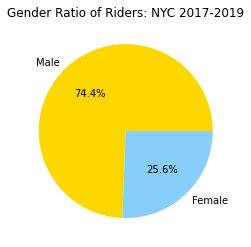

In [5]:
#Gender: 0=Unknown, 1=Male, 2=Female
plt.pie(counts[0:2], labels=['Male', 'Female'], colors = ['gold', 'lightskyblue'], autopct='%1.1f%%')
plt.title('Gender Ratio of Riders: NYC 2017-2019')
plt.show()
# based on users that provided their gender

In [6]:
users = data['usertype'].value_counts().keys().to_list()
count = data['usertype'].value_counts().to_list()

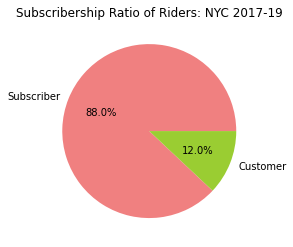

In [7]:
plt.pie(count, labels=users, colors = ['lightcoral', 'yellowgreen'], autopct='%1.1f%%')
plt.title("Subscribership Ratio of Riders: NYC 2017-19")
plt.show()

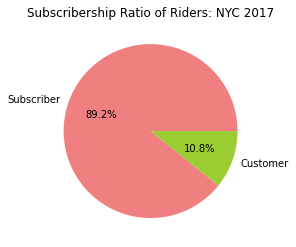

In [8]:
users_17 = df1['usertype'].value_counts().keys().to_list()
count_17 = df1['usertype'].value_counts().to_list()

plt.pie(count_17, labels=users_17, colors = ['lightcoral', 'yellowgreen'], autopct='%1.1f%%')
plt.title("Subscribership Ratio of Riders: NYC 2017")
plt.show()


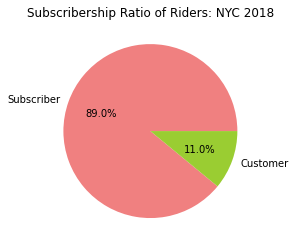

In [9]:
users_18 = df2['usertype'].value_counts().keys().to_list()
count_18 = df2['usertype'].value_counts().to_list()

plt.pie(count_18, labels=users_18, colors = ['lightcoral', 'yellowgreen'], autopct='%1.1f%%')
plt.title("Subscribership Ratio of Riders: NYC 2018")
plt.show()

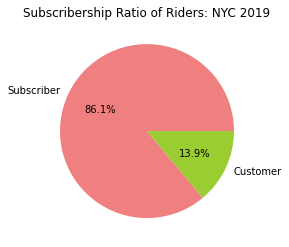

In [10]:
users_19 = df3['usertype'].value_counts().keys().to_list()
count_19 = df3['usertype'].value_counts().to_list()

plt.pie(count_19, labels=users_19, colors = ['lightcoral', 'yellowgreen'], autopct='%1.1f%%')
plt.title("Subscribership Ratio of Riders: NYC 2019")
plt.show()

In [11]:
birth_dict = dict(zip(data['birth year'].value_counts().keys().to_list(), data['birth year'].value_counts().to_list()))
#Remove birth years that don't make sense (any age more than 80 is removed)
cleaned_birth = {}
for key in birth_dict:
        if(int(key)>=1939):
            cleaned_birth[int(key)]=birth_dict[key]

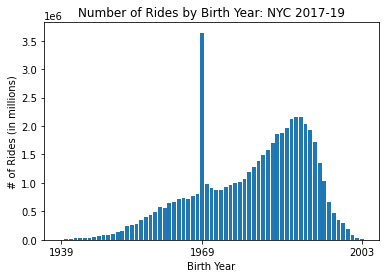

In [12]:
plt.bar(list(cleaned_birth.keys()), list(cleaned_birth.values()))
plt.xticks((1939,1969, 2003))
plt.xlabel("Birth Year")
plt.ylabel("# of Rides (in millions)")
plt.title("Number of Rides by Birth Year: NYC 2017-19")
plt.show()

In [13]:
#track ridership per year
years = data['year'].value_counts().keys().to_list()
rides = data['year'].value_counts().to_list()

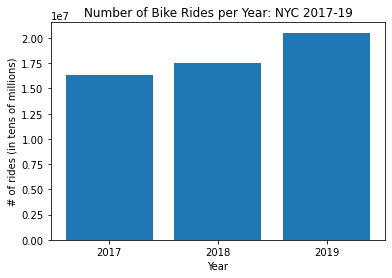

In [14]:
plt.bar(years, rides)
plt.xticks(years)
plt.xlabel("Year")
plt.ylabel("# of rides (in tens of millions)")
plt.title("Number of Bike Rides per Year: NYC 2017-19")
plt.show()

In [15]:
num_bikes_year =[]
num_bikes1 = len(df1['bikeid'].unique())
num_bikes_year.append(num_bikes1)

In [16]:
num_bikes2 = len(df2['bikeid'].unique())
num_bikes_year.append(num_bikes2)

In [17]:
num_bikes3 = len(df3['bikeid'].unique())
num_bikes_year.append(num_bikes3)

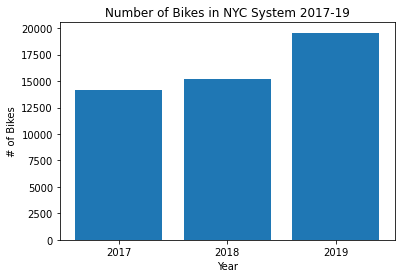

In [18]:
plt.bar([2017, 2018, 2019], num_bikes_year)
plt.xticks([2017, 2018, 2019])
plt.xlabel("Year")
plt.ylabel("# of Bikes")
plt.title("Number of Bikes in NYC System 2017-19")
plt.show()

In [19]:
#track rides by day of week over 3 year period
days = data['day_of_week'].value_counts().keys().to_list()
rides = data['day_of_week'].value_counts().to_list()
#Hardcoded the sorting into order of the week
days_sorted = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
rides_sorted = [7764607,8293852,8558266,8305116,7764607,7044409,6332237]

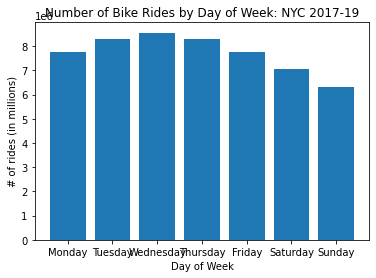

In [20]:
plt.bar(days_sorted, rides_sorted)
plt.xticks(days_sorted)
plt.xlabel("Day of Week")
plt.ylabel("# of rides (in millions)")
plt.title("Number of Bike Rides by Day of Week: NYC 2017-19")
plt.show()

In [21]:
#Make a data frame for weekdays and weekend
mask = data['day_of_week'].isin(['Saturday','Sunday'])
weekend_df=data[mask]
weekday_df=data[~mask]

In [22]:
weekend_hours = weekend_df['start_hour'].value_counts().keys().to_list()
weekend_count = weekend_df['start_hour'].value_counts().to_list()

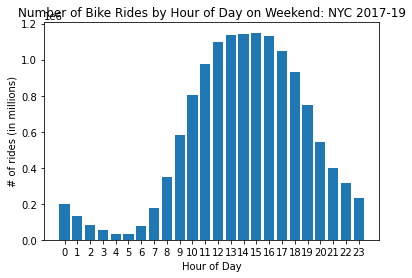

In [23]:
plt.bar(weekend_hours, weekend_count)
plt.xticks(weekend_hours)
plt.xlabel("Hour of Day")
plt.ylabel("# of rides (in millions)")
plt.title("Number of Bike Rides by Hour of Day on Weekend: NYC 2017-19")
plt.show()

In [24]:
weekday_hours = weekday_df['start_hour'].value_counts().keys().to_list()
weekday_count = weekday_df['start_hour'].value_counts().to_list()

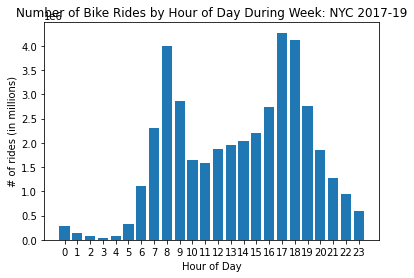

In [25]:
plt.bar(weekday_hours, weekday_count)
plt.xticks(weekday_hours)
plt.xlabel("Hour of Day")
plt.ylabel("# of rides (in millions)")
plt.title("Number of Bike Rides by Hour of Day During Week: NYC 2017-19")
plt.show()

In [26]:
weekend_dict = dict(zip(weekend_hours, weekend_count))
weekend_keys = (list(weekend_dict.keys()))
weekend_keys.sort()

weekend_sorted={}
for e in weekend_keys:
    weekend_sorted[e]=weekend_dict[e]

weekend_keys = list(weekend_sorted.keys())
weekend_values = list(weekend_sorted.values())

In [27]:
weekday_dict = dict(zip(weekday_hours, weekday_count))
weekday_keys = (list(weekday_dict.keys()))
weekday_keys.sort()

weekday_sorted={}
for e in weekday_keys:
    weekday_sorted[e]=weekday_dict[e]

weekday_keys = list(weekday_sorted.keys())
weekday_values = list(weekday_sorted.values())

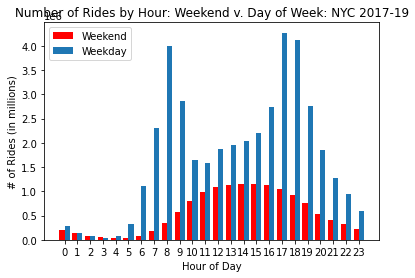

In [29]:
x = np.arange(len(weekend_keys))
ax = plt.subplot(111)
ax.bar(x-0.2, weekend_values, width=0.4, color='r', align='center', label='Weekend')
ax.bar(x+0.2, weekday_values, width=0.4, align='center', label='Weekday')
plt.xticks(weekend_keys)
plt.xlabel('Hour of Day')
plt.ylabel('# of Rides (in millions)')
plt.title('Number of Rides by Hour: Weekend v. Day of Week: NYC 2017-19')
plt.legend(loc = 'best')
plt.show()

In [30]:
#track rides by month over 3 year period
months = data['month'].value_counts().keys().to_list()
num_riders = data['month'].value_counts().to_list()

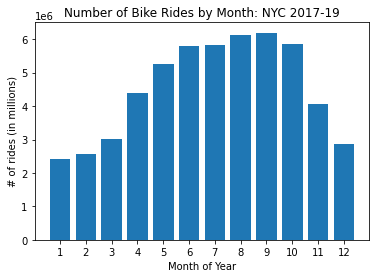

In [31]:
plt.bar(months, num_riders)
plt.xticks(months)
plt.xlabel("Month of Year")
plt.ylabel("# of rides (in millions)")
plt.title("Number of Bike Rides by Month: NYC 2017-19")
plt.show()

In [32]:
#track most common and least common start stations over 3 year period
start_stations = data['start station name'].value_counts().keys().to_list()
num_start = data['start station name'].value_counts().to_list()

start_dict = dict(zip(start_stations, num_start))

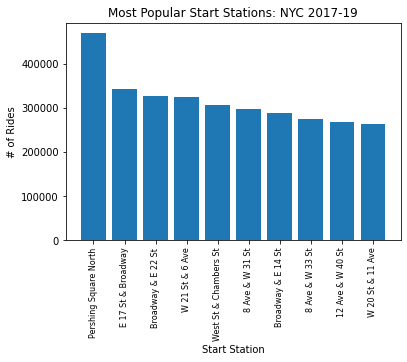

In [33]:
plt.bar(start_stations[0:10], num_start[0:10])
plt.xticks(start_stations[0:10], rotation='vertical', size=8)
plt.xlabel("Start Station")
plt.ylabel("# of Rides")
plt.title("Most Popular Start Stations: NYC 2017-19")
plt.show()

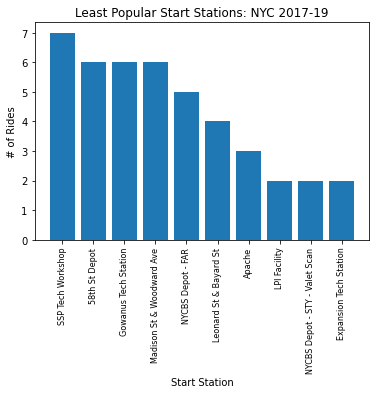

In [34]:
plt.bar(start_stations[-10:], num_start[-10:])
plt.xticks(start_stations[-10:], rotation='vertical', size=8)
plt.xlabel("Start Station")
plt.ylabel("# of Rides")
plt.title("Least Popular Start Stations: NYC 2017-19")
plt.show()

In [35]:
#track most common and leas common end stations over 3 year period
end_stations = data['end station name'].value_counts().keys().to_list()
num_end = data['end station name'].value_counts().to_list()

end_dict = dict(zip(end_stations, num_end))

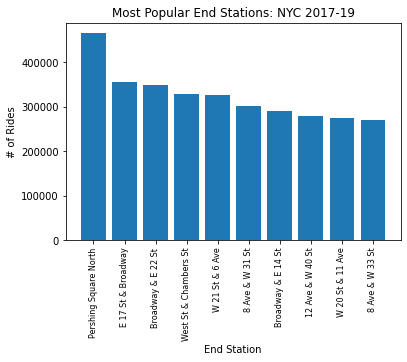

In [36]:
plt.bar(end_stations[0:10], num_end[0:10])
plt.xticks(end_stations[0:10], rotation='vertical', size=8)
plt.xlabel("End Station")
plt.ylabel("# of Rides")
plt.title("Most Popular End Stations: NYC 2017-19")
plt.show()

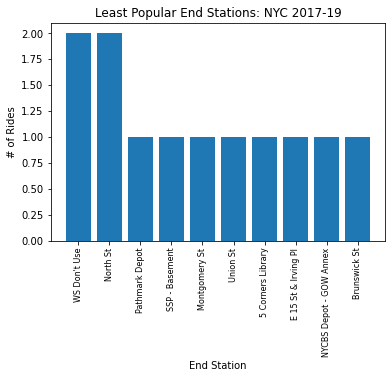

In [37]:
plt.bar(end_stations[-10:], num_end[-10:])
plt.xticks(end_stations[-10:], rotation='vertical', size=8)
plt.xlabel("End Station")
plt.ylabel("# of Rides")
plt.title("Least Popular End Stations: NYC 2017-19")
plt.show()

In [38]:
#combine start and end dicts and sort by value
def combine(d1, d2):
    new_dict=d1
    for key in d2:
        if key in new_dict:
            new_dict[key] += d2[key]
        else:
            new_dict[key]=d2[key]
    return new_dict

#Sort overall dict by value in increasing order to identify top and bottom stations
overall_dict = combine(start_dict, end_dict)
overall_dict={k: v for k, v in sorted(overall_dict.items(), key=lambda item: item[1])}

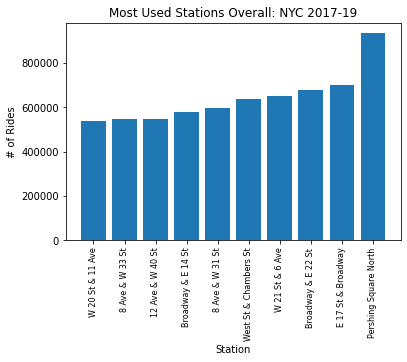

In [39]:
plt.bar((list(overall_dict.keys()))[-10:], (list(overall_dict.values()))[-10:])
plt.xticks((list(overall_dict.keys()))[-10:], rotation='vertical', size=8)
plt.xlabel("Station")
plt.ylabel("# of Rides")
plt.title("Most Used Stations Overall: NYC 2017-19")
plt.show()


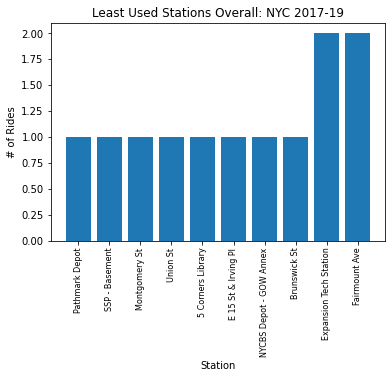

In [40]:
plt.bar((list(overall_dict.keys()))[0:10], (list(overall_dict.values()))[0:10])
plt.xticks((list(overall_dict.keys()))[0:10], rotation='vertical', size=8)
plt.xlabel("Station")
plt.ylabel("# of Rides")
plt.title("Least Used Stations Overall: NYC 2017-19")
plt.show()

In [41]:
#How does the number of stations change?
num_stations=[]
stations_2017 = len(list(pd.concat([df1['start station name'], df1['end station name']]).unique()))
num_stations.append(stations_2017)

In [42]:
stations_2018 = len(list(pd.concat([df2['start station name'], df2['end station name']]).unique()))
num_stations.append(stations_2018)

In [43]:
stations_2019 = len(list(pd.concat([df3['start station name'], df3['end station name']]).unique()))
num_stations.append(stations_2019)

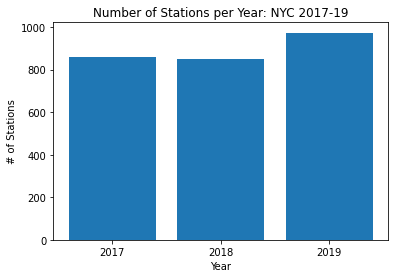

In [44]:
plt.bar([2017,2018,2019], num_stations)
plt.xticks([2017,2018,2019])
plt.xlabel("Year")
plt.ylabel("# of Stations")
plt.title("Number of Stations per Year: NYC 2017-19")
plt.show()

In [45]:
#determine tripduration statistics (min, max, average, std, etc.)
data['tripduration'].describe()

count    5.440129e+07
mean     1.379260e+01
std      1.286110e+01
min      1.016667e+00
25%      6.066667e+00
50%      1.021667e+01
75%      1.781667e+01
max      2.399833e+02
Name: tripduration, dtype: float64

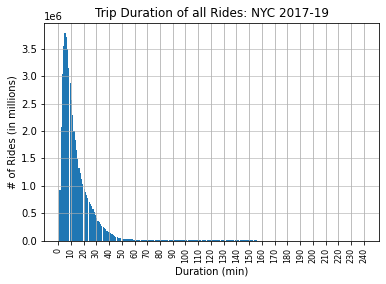

In [46]:
times = data['tripduration']
times.plot.hist(grid=True, bins=240, rwidth=0.9)
plt.title('Trip Duration of all Rides: NYC 2017-19')
plt.xlabel('Duration (min)')
plt.ylabel('# of Rides (in millions)')
ticks=[]
for i in range(250):
    if i%10==0:
        ticks.append(i)
plt.xticks(ticks, rotation='vertical', size=8)

plt.grid(axis='y', alpha=0.75)

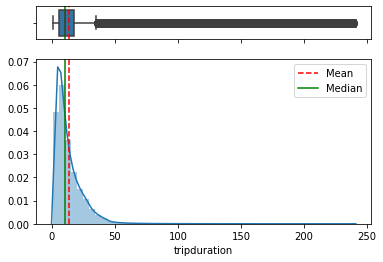

In [65]:
#Box plot and Dist plot with mean and median lines
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
mean=data['tripduration'].mean()
median=data['tripduration'].median()

sns.boxplot(data['tripduration'], ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')

sns.distplot(data['tripduration'], ax=ax_hist)
ax_hist.axvline(mean, color='r', linestyle='--')
ax_hist.axvline(median, color='g', linestyle='-')

plt.legend({'Mean':mean,'Median':median})

ax_box.set(xlabel='')
plt.show()

In [47]:
#Subcriber v Customer Rides
grouped_user = data.groupby(data['usertype'])
df_sub = grouped_user.get_group('Subscriber')
df_cust = grouped_user.get_group('Customer')

In [48]:
df_sub['tripduration'].describe()

count    4.784858e+07
mean     1.227137e+01
std      1.008005e+01
min      1.016667e+00
25%      5.716667e+00
50%      9.366667e+00
75%      1.575000e+01
max      2.399833e+02
Name: tripduration, dtype: float64

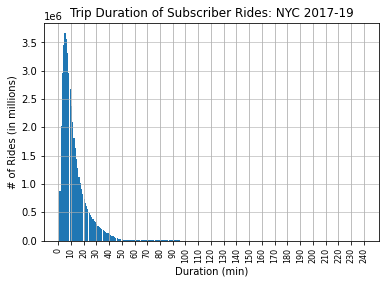

In [49]:
sub_times = df_sub['tripduration']
sub_times.plot.hist(grid=True, bins=240, rwidth=0.9)
plt.title('Trip Duration of Subscriber Rides: NYC 2017-19')
plt.xlabel('Duration (min)')
plt.ylabel('# of Rides (in millions)')
ticks=[]
for i in range(250):
    if i%10==0:
        ticks.append(i)
plt.xticks(ticks, rotation='vertical', size=8)

plt.grid(axis='y', alpha=0.75)

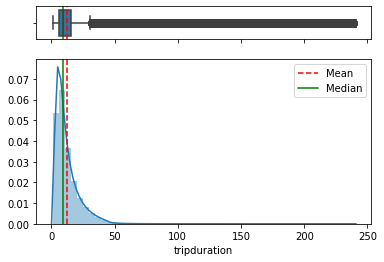

In [50]:
#Box plot and Dist plot with mean and median lines
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
mean=df_sub['tripduration'].mean()
median=df_sub['tripduration'].median()

sns.boxplot(df_sub['tripduration'], ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')

sns.distplot(df_sub['tripduration'], ax=ax_hist)
ax_hist.axvline(mean, color='r', linestyle='--')
ax_hist.axvline(median, color='g', linestyle='-')

plt.legend({'Mean':mean,'Median':median})

ax_box.set(xlabel='')
plt.show()

In [51]:
df_cust['tripduration'].describe()

count    6.536886e+06
mean     2.490885e+01
std      2.216781e+01
min      1.016667e+00
25%      1.296667e+01
50%      2.075000e+01
75%      2.850000e+01
max      2.399833e+02
Name: tripduration, dtype: float64

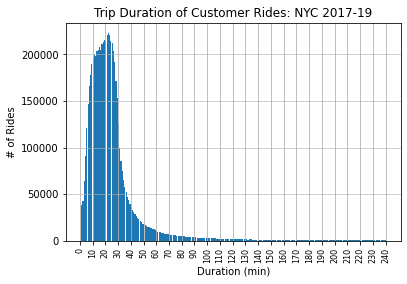

In [52]:
cust_times = df_cust['tripduration']
cust_times.plot.hist(grid=True, bins=240, rwidth=0.9)
plt.title('Trip Duration of Customer Rides: NYC 2017-19')
plt.xlabel('Duration (min)')
plt.ylabel('# of Rides')
ticks=[]
for i in range(250):
    if i%10==0:
        ticks.append(i)
plt.xticks(ticks, rotation='vertical', size=8)

plt.grid(axis='y', alpha=0.75)

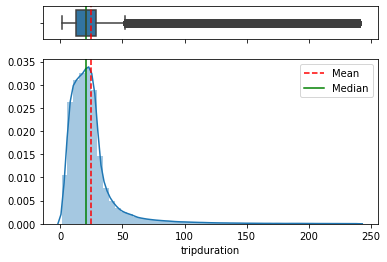

In [73]:
#Box plot and Dist plot with mean and median lines
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
mean=df_cust['tripduration'].mean()
median=df_cust['tripduration'].median()

sns.boxplot(df_cust['tripduration'], ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')

sns.distplot(df_cust['tripduration'], ax=ax_hist)
ax_hist.axvline(mean, color='r', linestyle='--')
ax_hist.axvline(median, color='g', linestyle='-')

plt.legend({'Mean':mean,'Median':median})

ax_box.set(xlabel='')
plt.show()

In [53]:
weekend_df['tripduration'].describe()

count    1.337665e+07
mean     1.583002e+01
std      1.543140e+01
min      1.016667e+00
25%      6.500000e+00
50%      1.156667e+01
75%      2.096667e+01
max      2.399833e+02
Name: tripduration, dtype: float64

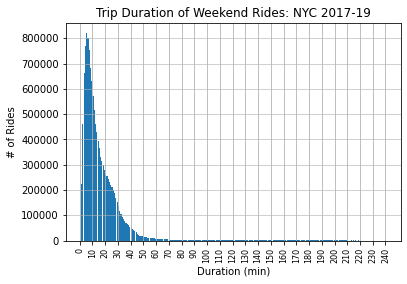

In [55]:
weekend_times = weekend_df['tripduration']
weekend_times.plot.hist(grid=True, bins=240, rwidth=0.9)
plt.title('Trip Duration of Weekend Rides: NYC 2017-19')
plt.xlabel('Duration (min)')
plt.ylabel('# of Rides')
ticks=[]
for i in range(250):
    if i%10==0:
        ticks.append(i)
plt.xticks(ticks, rotation='vertical', size=8)

plt.grid(axis='y', alpha=0.75)

In [56]:
weekday_df['tripduration'].describe()

count    4.102465e+07
mean     1.312827e+01
std      1.182800e+01
min      1.016667e+00
25%      5.933333e+00
50%      9.866667e+00
75%      1.686667e+01
max      2.399833e+02
Name: tripduration, dtype: float64

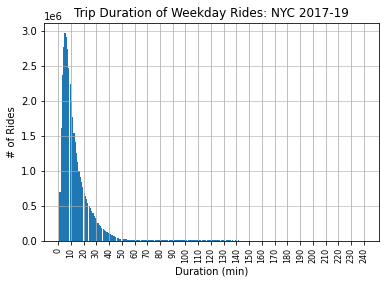

In [58]:
weekday_times = weekday_df['tripduration']
weekday_times.plot.hist(grid=True, bins=240, rwidth=0.9)
plt.title('Trip Duration of Weekday Rides: NYC 2017-19')
plt.xlabel('Duration (min)')
plt.ylabel('# of Rides')
ticks=[]
for i in range(250):
    if i%10==0:
        ticks.append(i)
plt.xticks(ticks, rotation='vertical', size=8)

plt.grid(axis='y', alpha=0.75)